Function fitting (Kernel Ridge Regression) : molecular solubility
====

This computer project introduces Kernel Ridge Regression (also known as Gaussian process regression) for fitting 
functions in many dimensions. The concrete application is to make a model of the solubility of small organic
molecules as a function of their molecular structure. 

The number of different organic molecules is enormous, even just considering the small ones. There is an [online database](https://gdb.unibe.ch/downloads) 
of all possible organic molecules made from various number of heavy (non-hydrogen) atoms.
The number of possibilities is enormous, here is a fun fact: you can make nearly [1 billion different shapes from 
6 LEGO bricks](https://brickset.com/article/30827/review-624210-lego-house-6-bricks). One of them is shown below
(printed on a visitor card at the end of a tour, each one unique). Organic molecules are bit similar: you can branch the carbon framework and hang 
off three other elements (H,O,N) or more (if you include halides like Cl and F, or second row elements like P and S).

<img src="lego_6_bricks_card.jpg" width=300>

Function fitting
---

We start by fitting a simple one variable function using a variety of ways.

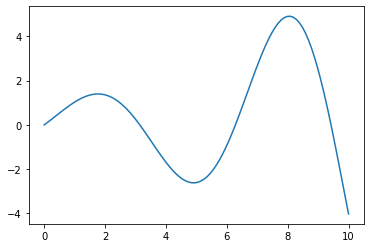

In [ ]:
import numpy as np
from matplotlib.pyplot import *
from scipy import stats

# target function
def f(x):
    return np.sin(x)*np.exp(x/5)

xx = np.linspace(0,10, 100)
yy = f(xx)

plot(xx, yy)

Text(0, 0.5, 'y')

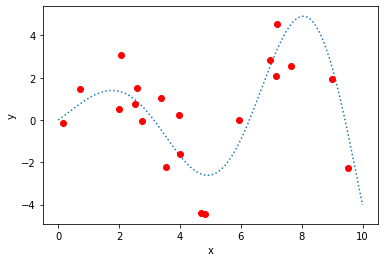

In [ ]:
# gather some data points which we will fit to

points = 20

# Training data with no noise
#x = np.random.random(points)*10
#y = f(x)

# Training data with noise
x = np.random.random(points)*10
noise = [np.random.uniform(-2, 2) for i in range(len(x))]
y = f(x) + noise


plot(xx, yy, ':')
plot(x, y, 'ro')
xlabel("x")
ylabel("y")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
0.44123321793489395
0.44291018572184776
0.4461002983624723
0.4557672934315436
0.47446442487822843
0.49911922366466516
0.5100860509928892
0.5094890979763058
0.5063283366889034
-0.14635573270689015
0.884064693672151
0.8976612203513075
0.9043708672270951
0.9090790440926865
0.9073055854806951
0.8936819259642226
0.8758739683452945
0.8682914289828295
0.766512743208225
0.5324343306570065
0.44604939199024796
0.37605853452891813
0.35006935409892126
0.32196033062301627
0.2773116044388806
0.23959200154373853
0.22329593246734739


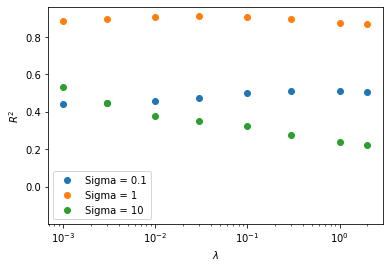

In [ ]:
# define a Gaussian kernel
import matplotlib.pyplot as plt

def kernel(x1, x2, sig):
    return np.exp(-(x1-x2)**2/(2*sig**2))


def kernel_regression(lam, sig):
    # sig length scale (0.1 to 10)
    # lam strength of regulariser

    N = len(x)
    K = np.zeros((N,N))

    # Now apply the formulas from the lecture to fill in the kernel matrix and 
    # compute fitting coefficients. Use the function numpy.linalg.lstsq() to 
    #solve the linear problem K@c=y
    # (look up its documentation, and don't forget that it returns 4 things,
    # but you only need the solution vector)
    for i in range(N):
        for j in range(N):
            K[i,j] = kernel(x[i], x[j], sig)

    I = np.identity(N)
    K_prime = K + lam*I

    c = np.linalg.lstsq(K_prime,y)[0]

    # now use your coefficients to predict the function on the xx array
    y_pred = []
    for x_bar in xx:
        y_temp = 0
        for i in range(len(c)):
            y_temp += c[i]*kernel(x_bar, x[i], sig)
        y_pred.append(y_temp)

    slope, intercept, r_value, p_value, std_err = stats.linregress(yy, y_pred)
    print(r_value)

    #plot(xx, yy, ':')
    #plot(x, y, 'ro')
    #plot(xx, y_pred, 'k')

    return r_value, y_pred


sig_range = [0.1, 0.25, 0.5, 0.75, 1, 2, 5, 10]
lam_range = [0, 0.001,0.003, 0.01, 0.03, 0.1, 0.3, 1, 2] # Plot on a log scale

def sig_dependence():
    r_value_list = []
    for sig in sig_range:
        lam = 0.001
        r, y_p = kernel_regression(lam, sig)
        r_value_list.append(r)

    plt.plot(sig_range, r_value_list)


def lam_dependence(sig):
    r_value_list = []
    for lam in lam_range:
        #sig = 2
        r, y_p = kernel_regression(lam, sig)
        r_value_list.append(r)

    plt.plot(lam_range, r_value_list, 'o')
    xscale('log')
    xlabel("$λ$")
    ylabel("$R^2$")

#sig_dependence()

for sig in [0.1, 1, 10]:
    lam_dependence(sig)

plt.legend(["Sigma = 0.1","Sigma = 1","Sigma = 10"])
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()


# kernel_regression(lam, sig)

# the lengthscale sig between 0.1 and 10,
# the regularisation strength lam between 0.001 and 2,
# the number of data points between 1 and 20


0.8758739683452945
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0, 0.5, 'Analytical solution')

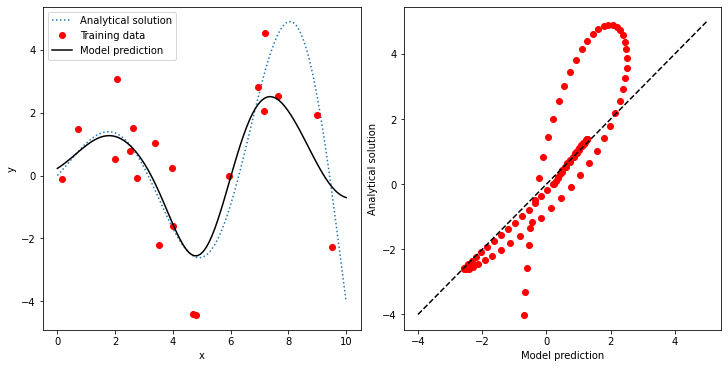

In [ ]:
# you should get something like the picture below:
r, y_pred = kernel_regression(1, 1) #(lam, sig)

plt.rcParams['figure.figsize'] = [10, 5]
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
#ax1.set_box_aspect(0.35)
#ax2.set_box_aspect(0.35)

ax1.plot(xx, yy, ':')
ax1.plot(x, y, 'ro')
ax1.plot(xx, y_pred, 'k')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend(["Analytical solution", "Training data", "Model prediction"])

ax2.scatter(y_pred, yy, color="red")
ax2.plot([-4,5], [-4,5], 'k--')
ax2.set_xlabel("Model prediction")
ax2.set_ylabel("Analytical solution")


Text(0, 0.5, 'Analytical solution')

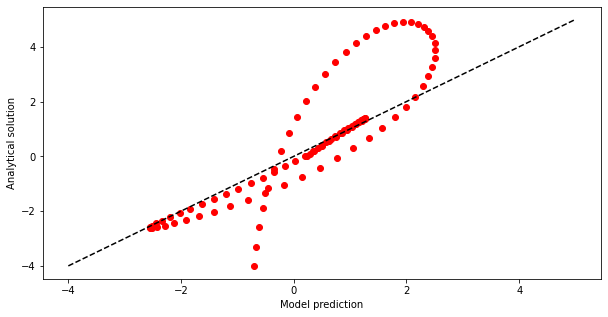

In [ ]:
scatter(y_pred, yy, color="red")
plot([-4,5], [-4,5], 'k--')
xlabel("Model prediction")
ylabel("Analytical solution")

Task 1
--

Using now explore the predictions by varying
- the lengthscale sig between 0.1 and 10,
- the regularisation strength lam between 0.001 and 2, 
- the number of data points between 1 and 20

Give a summary of your findings, including the interplay between the above parameters!

Optional Extension
----

Investigate what happens when you add i.i.d random noise of a certain size to the _data values_ that you
fit to (But still of course plot the original function without noise to compare with, as well as the data points
with noise added).

Molecular solubility dataset
----

The dataset below contains the solubility of nearly 10K molecules. The original data came from here: 

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/OVHAW8<br>
https://www.nature.com/articles/s41597-019-0151-1

In [ ]:
import pandas
import math

In [ ]:
sol = pandas.read_csv("curated-solubility-dataset.csv")

In [ ]:
sol

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [ ]:
sol.columns

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

In [ ]:
sol['Solubility'][0] # here is how to access a given property, here the solubility of the first molecule

-3.6161271205

(array([  2.,   0.,   0.,   2.,   0.,   4.,   0.,   1.,   3.,   3.,  10.,
         12.,  20.,  37.,  45.,  68.,  90., 110., 122., 148., 155., 140.,
        119., 143., 181., 223., 259., 294., 340., 362., 397., 405., 489.,
        494., 597., 566., 527., 564., 511., 444., 399., 340., 293., 245.,
        284., 255., 224.,  39.,  13.,   3.]),
 array([-1.31719000e+01, -1.28657084e+01, -1.25595167e+01, -1.22533251e+01,
        -1.19471335e+01, -1.16409418e+01, -1.13347502e+01, -1.10285586e+01,
        -1.07223669e+01, -1.04161753e+01, -1.01099837e+01, -9.80379204e+00,
        -9.49760041e+00, -9.19140878e+00, -8.88521715e+00, -8.57902551e+00,
        -8.27283388e+00, -7.96664225e+00, -7.66045062e+00, -7.35425898e+00,
        -7.04806735e+00, -6.74187572e+00, -6.43568409e+00, -6.12949245e+00,
        -5.82330082e+00, -5.51710919e+00, -5.21091756e+00, -4.90472593e+00,
        -4.59853429e+00, -4.29234266e+00, -3.98615103e+00, -3.67995940e+00,
        -3.37376776e+00, -3.06757613e+00, -2.76138

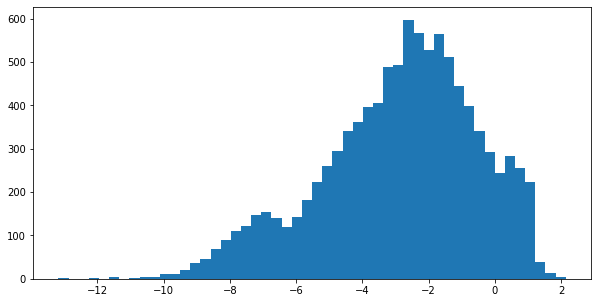

In [ ]:
hist(sol['Solubility'], bins=50)

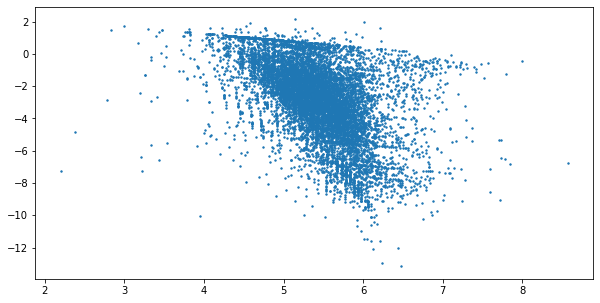

In [ ]:
# we can plot the solubility against any given property. Clearly there are relationships, but the solubility is not determined well 
# by any single property. Note how it's better to work with the log of the molecular weight (MolWt)
scatter(np.log(sol['MolWt']), sol['Solubility'], s=2)

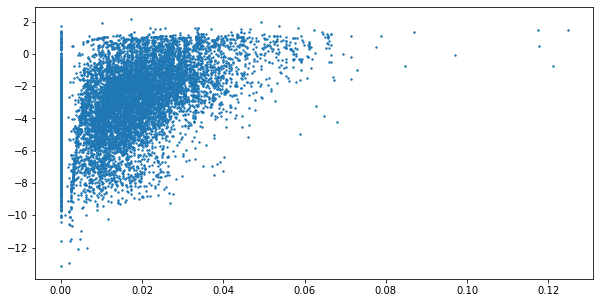

In [ ]:
scatter((sol['NumHAcceptors']+sol['NumHDonors'])/sol['MolWt'], sol['Solubility'], s=2)

Linear fit
---

In [ ]:
Y = np.array(sol['Solubility']); 

proplist = ['HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount']

X = np.array([list(sol[prop]/sol['MolWt']) for prop in proplist]) # Many properties are extensive, so we divide by the molecular weight
X = np.insert(X, 0, list(np.log(sol['MolWt'])), axis=0) # add the log MolWt as well

In [ ]:
print(X[0]) # 1 data point with 11 elements/features
print(X[0][0]) # The first feature value in the 1st data point
print(X.shape[1]) # we have 9982 data vectors = N

[5.97256201 5.13098097 4.94569847 ... 5.01210754 6.11944211 5.73118037]
5.972562014604919
9982


In [ ]:
c,_,_,_ = np.linalg.lstsq(X.T, Y) # here we fit a LINEAR MODEL , solving the equation  X.T @ c = Y

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [ ]:
c # these are the resulting fitting coefficients

array([ -1.10944433, -30.53332194,  79.21167928,  55.03896321,
        25.21188812, -28.95483872,  11.72036499, -45.36677569,
        42.95943772, -16.12008719, -61.48686288])

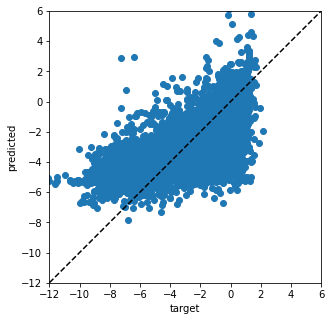

In [ ]:
# now we make a scatter plot of target solubility versus predicted solubility
scatter(Y, X.T @ c)
plot([-50,50], [-50,50], 'k--')
xlim(-12,6)
ylim(-12,6)
ylabel('predicted')
xlabel('target')
gca().set_aspect('equal')

In [ ]:
# We can calculate the mean squared error of our fit. The solubility values are such that a method with prediction error > 1 is not that useful. 
print(np.sqrt(sum((Y- X.T @ c)**2)/len(Y)))

slope, intercept, r_value, p_value, std_err = stats.linregress(Y, X.T @ c)
print(r_value)

1.765213071362543
0.6669181246463025


Task 2
---

Now use the Kernel Ridge Regression method to make a kernel fit of the solubility. Your kernel should still be the Gaussian function, but
it operates on vector arguments. You can start with a single sigma, identical for each property, but then choose different lengthscales (sig) in each dimension (a sensible starting value is the standard deviation of the data in each dimension) 

$$
K(x, x') = e^{-\sum_i|x_i-x'_i|^2/(2\sigma_i^2)}
$$

Here $x_i$ refers not to the $i$th data point, but to the $i$th element of the multidimensional data point vector $x$. Optimise the regularisation 
strength to obtain the best fit. You should split your data into a training and test set, and report the prediction error separately. 

R value: -0.5010415537362852


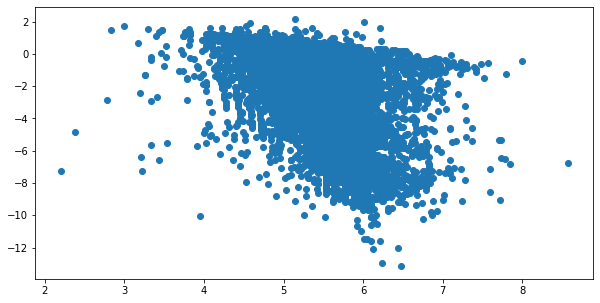

R value: 0.027065351764313714


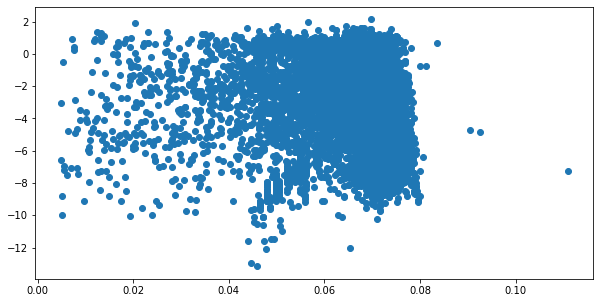

R value: 0.43802798486194483


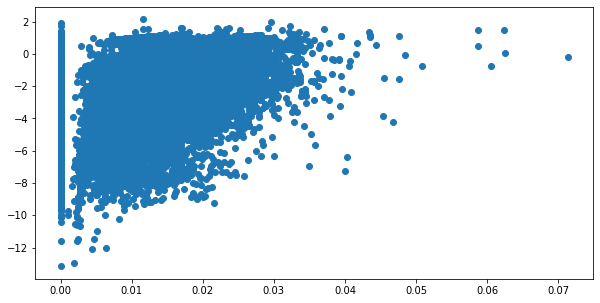

R value: 0.3947461011454244


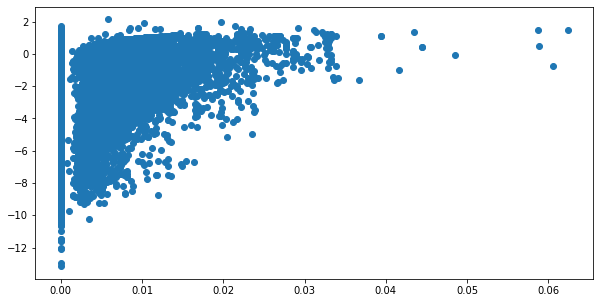

R value: 0.3844512448791978


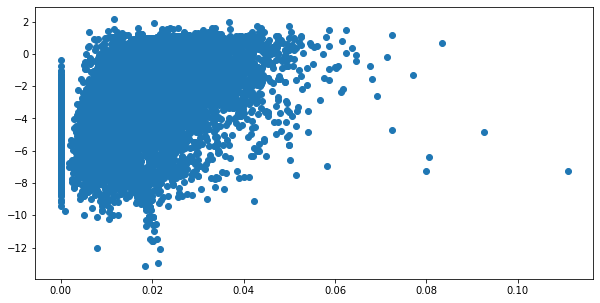

R value: -0.03211063585417683


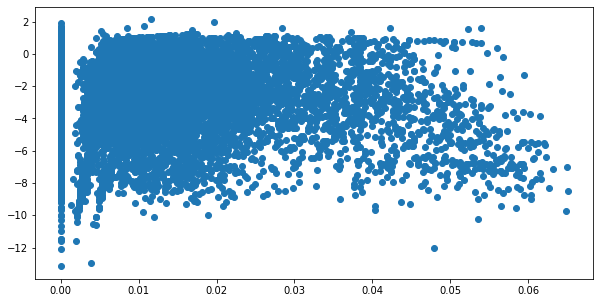

R value: 0.13960878318393288


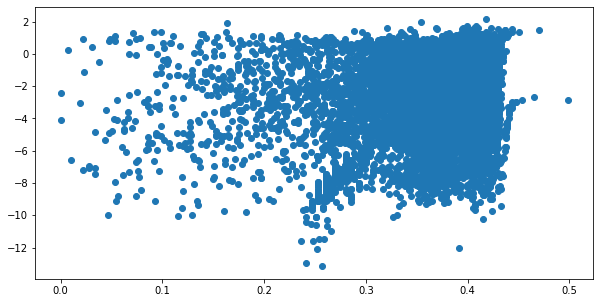

R value: -0.24451230710045493


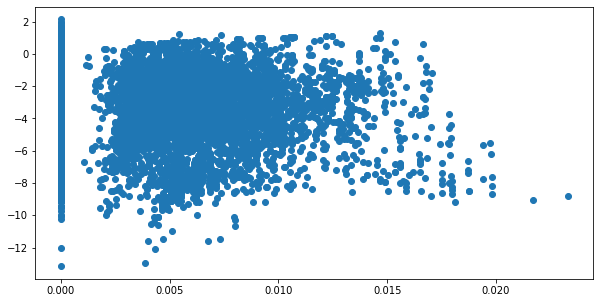

R value: 0.0424078792702428


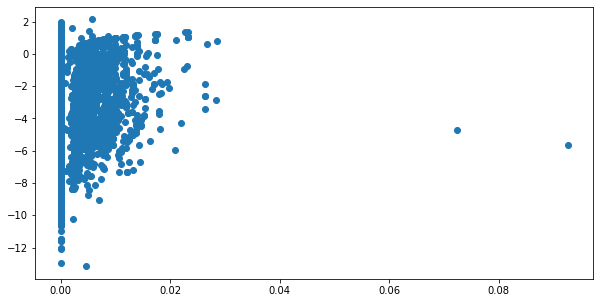

R value: -0.00017088309058397534


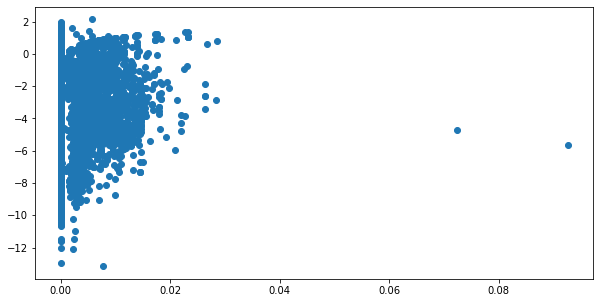

R value: -0.20379037197365163


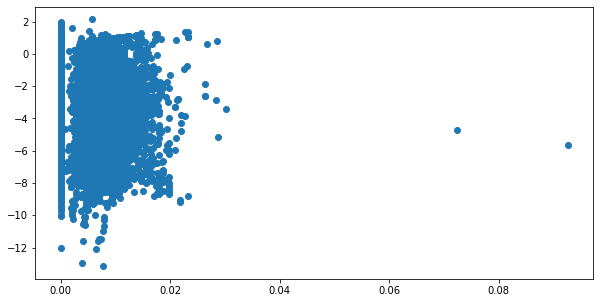

In [ ]:
for i in range(11):
    plt.scatter(X[i], Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X[i], Y)
    print("R value:", r_value)
    plt.show()


1000
(11, 1000) (11, 1997)
(1000,) (1997,)
Sigmas: [0.528998477782611, 0.011221959236993196, 0.007899470886039586, 0.0056629343726780565, 0.009778148385012928, 0.012906059261422291, 0.06176551849116927, 0.003827609546375886, 0.0025456254999199853, 0.00319363873318701, 0.004347201100897515]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
R value: 0.9051165970333651
1.088539888157731


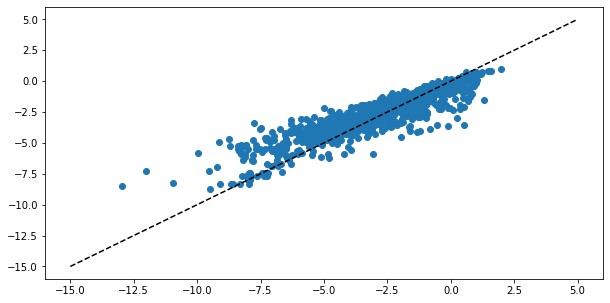

In [ ]:
# First we need to split the data set X, Y into a training set, validation set and 
# test set.
from sklearn.model_selection import train_test_split

X = np.array([list(sol[prop]/sol['MolWt']) for prop in proplist]) # Many properties are extensive, so we divide by the molecular weight
X = np.insert(X, 0, list(np.log(sol['MolWt'])), axis=0) # add the log MolWt as well

X_train, X_test, y_train, y_test = train_test_split(np.transpose(X), Y, test_size=0.2, random_state=0)

sample_size = 1000 # len(X_train)
print(sample_size)

X_train = X_train[:sample_size][:sample_size]
X_train = np.transpose(X_train)

y_train = y_train[:sample_size]
X_test = np.transpose(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


def vector_kernal(X, x1, sig):
    # X is the matrix of training data with shape (N, f) where N is the number
    # of data points and f is the number of features for each data point
    # sig[f] is the standard deviation of feature f as an initial guess, this can be optimised

    #total = 0
    #num_features = X.shape[0] # f is the number of features
    #for f in range(num_features):
    #    total += ((abs(x1[f]-x2[f]))**2)/(2*(sig[f]**2))
    #return math.exp(-total)

    vector_solution = np.exp(-(((abs(np.array(np.transpose(X))-np.array(x1)))**2)/(2*np.array(sig)**2)).sum(axis=1))
    
    return vector_solution


N = X_train.shape[1] # N is the number of data vectors in train set
f = X_train.shape[0] # f is the number of features
K = np.zeros((N,N))
lam = 1

# Define vector of sigmas as the standard deviation of a feature
sigmas = []

for s in range(f):
    sigmas.append(1*np.std(X_train[:][s]))

print("Sigmas:",sigmas)

#for i in range(N):
#    for j in range(N):
#        K[i,j] = vector_kernal(X_train[:, i], X_train[:, j], sigmas)

#X_train[:, y] is the yth data point
for i in range(N):
    K[i, :] = vector_kernal(X_train, X_train[:, i], sigmas)


I = np.identity(N)
K_prime = K + lam*I

# C is a vector that is the same size as Y
C = np.linalg.lstsq(K_prime, y_train)[0] # Solves the equation C = (K+lam*I)^-1.Y

# Test the model on the training data
plt.scatter(y_train, K @ C)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_train, K @ C)
print("R value:", r_value)
print(np.sqrt(sum((y_train- K @ C)**2)/len(y_train)))
plt.plot([-15,5], [-15,5], 'k--')
plt.show()


def test_model():
    # Test model
    N_test = X_test.shape[1]
    K_test = np.zeros((N,N_test))

    #for i in range(N):
    #    for j in range(N_test):
    #        K_test[i,j] = vector_kernal(X_train[:, i], X_test[:, j], sigmas)

    for j in range(N_test):
        K_test[:, j] = vector_kernal(X_train, X_test[:, j], sigmas)

    # now use coefficients to predict the solubility
    print(K_test.shape)
    print(np.transpose(K_test).shape)
    print(C.shape)
    Y_pred = np.transpose(K_test) @ C

    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, Y_pred)
    print("R value:", r_value)
    print(np.sqrt(sum((y_test- Y_pred)**2)/len(y_test)))

    plt.scatter(y_test, Y_pred)
    plt.plot([-15,5], [-15,5], 'k--')
    ylabel('predicted')
    xlabel('target')
    plt.show()




R value: 0.9051165970333651
1.088539888157731


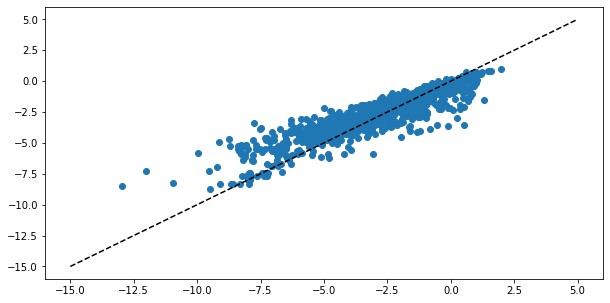

In [ ]:
# Test model against the training data (In-sample bias, bad performance measurement!)

scatter(y_train, K @ C)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_train, K @ C)
print("R value:", r_value)
print(np.sqrt(sum((y_train- K @ C)**2)/len(y_train)))
plot([-15,5], [-15,5], 'k--')

Optional extension
---

You can optimise the $\sigma$ array formally, by minimising an objective function, e.g. the error on a _test set_, or even better,
average error on multiple test sets (given multiple random test/train splits). You can make the regulariser $\lambda$ part of the
optimisation too. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27a01094-5de0-4888-92ad-3e5e8b82abb1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>